# Improving Performance

In the last session we developed Backpropagation and introduced some methods to improve our training speeds and accuracy. What we have introduced so far is the core of how backpropogation and training works, but we can now build on that considerably. Today we will look at some more ways in which we can improve training in a coarse way, and we will then look at some methods that can help to prevent us from overfitting to our data.

Before we get going, let's just re-define some of our basic code definitions. This is all stuff we have introduced in previous weeks.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Standardization over 2D arrays
def standardize(x):
    col_means = np.mean(x,axis=0)
    col_std = np.std(x,axis=0)
    return (x - col_means) / col_std , col_means, col_std

# Linear Regression Function definition
def hLinear(theta_in,X_in):
    return np.matmul(theta_in,X_in)

def hLogistic(theta_in,X_in):
    z = np.matmul(theta_in,X_in)
    return 1 / (1 + np.exp(-z))

# Cost function for Linear regression
def cost_linear(theta,xi,yi):
    # note - this function calculate the cost for all variations of theta. A vector is returned.
    h = np.matmul(theta,xi)
    rv = ((h - yi)**2) / 2
    return rv

# The outer cost function 'J' calculator. This iterates over our training cases.
def J(theta,x,y,f):
    s = 0
    m = len(x)
    for i in range(0,m):
        v = f(theta,x[i],y[i])
        s+= v
    return s / m

# implementation of the gradient descent algorithm
def gd(theta_in,min_delta_in,a_in,X_in,Y_in,h,maxiterations=-1,cost=cost_linear):
    m = len(Y_in) # number of training examples
    _ , n = np.shape(X_in) # number of features

    # define a list used to store the costs - these do not have to be calculated but are useful for debugging
    c = []

    # Create a theta variable which we will use to keep track of the current value of theta
    theta = theta_in

    # Create a list which we will use for storing theta results during optimization
    thetas = np.array(theta_in,ndmin=2)

    # Create a counter which is used for limiting the number of iterations used if maxiterations has been defined
    k = 0

    # Begin main search loop
    while maxiterations is -1 or k < maxiterations:
        k+=1
        # log the cost - useful for visualisation and later analysis
        c.append(J(theta_in,X_in,Y_in,cost))

        # save a copy of the parameters -- this is the set we will read from
        temp = np.copy(theta)
        # iterate over all features -- remember though that we apply changes in parallel
        for j in range(0,n):
            # making calculations for jth parameter
            s = 0
            # calculate our gradient update over all training cases
            for i in range(0,m):
                s+=  (h(temp.T,np.ravel(X_in[i,:])) - Y_in[i])  * X_in[i,j]
            theta[j] = temp[j] - a_in * (1/m) * s

        # log the changed parameters
        thetas = np.vstack((thetas,theta))

        # not lets check to see if we are still making progress -- i.e., that our cost is reducing
        # we check to make sure that at least one of our parameters is changing by a minimum threshold
        progressing = False
        for j in range(0,n):
            if(abs(temp[j] - theta[j]) > min_delta_in):
                progressing = progressing | True
        if not progressing: break

    # if we have completed a maximum number of iterations -- or if we are no longer improving -- return
    return thetas, c

<>:54: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:54: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:54: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:54: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-1-a99bde03d3bf>:54: SyntaxWarning: "is" with a literal. Did you mean "=="?
  while maxiterations is -1 or k < maxiterations:
<ipython-input-1-a99bde03d3bf>:54: SyntaxWarning: "is" with a literal. Did you mean "=="?
  while maxiterations is -1 or k < maxiterations:


## Hyperbolic Tangent Neurons
The switch to Cross Entropy Loss function last week was designed to speed up our laearning, but there are other ways in which we can speed up learning.

To this point our neural network examples have exclusively used the logistic neuron for hidden layers. This neuron is characterised by the logistic activation function:

\begin{equation}
g(z) = \frac{1}{1+ e^{-z}}
\end{equation}

and its derivative:

\begin{equation}
g'(z) = a\; (1-a)
\end{equation}

or more generally

\begin{equation}
g'(z) = \frac{e^{-z}}{ (1 + e^{-z})^2}
\end{equation}

where $z$ is the logit and defined as $z=\theta x$. But as mentioned previously other neuron types are possible.

All standard neurons differ in the definition of their activation function. In essence any activation function can be used so long as the activation function has a smooth derivative.

The Hyperbolic Tangent function or tanh, like the logistic function, is an example of a sigmoid function. The function is defined as:

\begin{equation}
g(z) = \frac{ e^{z} - e^{-z}}{e^{z} + e^{-z}}
\end{equation}

and its derivative is given by:

\begin{equation}
g'(z) = 1 - tanh^{2}(z)
\end{equation}

If we visualize the tanh function for a range of parameters we can see that it is broadly similar to the logistic function in form but has a range [-1,1] rather than [0,1] as is the case for the sigmoid.

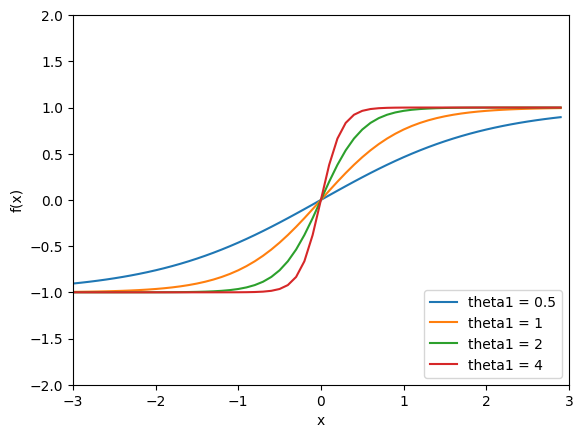

In [2]:
x1 = np.arange(-3,3,0.1)
x0 = np.array([1]*len(x1))
x = np.vstack((x0,x1))
z0 = np.matmul(np.array([0,0.5]),x)
z1 = np.matmul(np.array([0,1]),x)
z2 = np.matmul(np.array([0,2]),x)
z3 = np.matmul(np.array([0,4]),x)

plt.plot(x1,(np.exp(z0) - np.exp(-z0)) / (np.exp(z0) + np.exp(-z0)) )
plt.plot(x1,(np.exp(z1) - np.exp(-z1)) / (np.exp(z1) + np.exp(-z1)) )
plt.plot(x1,(np.exp(z2) - np.exp(-z2)) / (np.exp(z2) + np.exp(-z2)) )
plt.plot(x1,(np.exp(z3) - np.exp(-z3)) / (np.exp(z3) + np.exp(-z3)) )
plt.xlim([-3,3])
plt.ylim([-2,2])
plt.ylabel("f(x)")
plt.xlabel("x")
plt.legend(['theta1 = 0.5','theta1 = 1', 'theta1 = 2', 'theta1 = 4'], loc='lower right')
plt.show()

Tanh can also be interpreted as a rescaled sigmoid function (with a little horizontal stretching). We can see the two functions contrasted below.

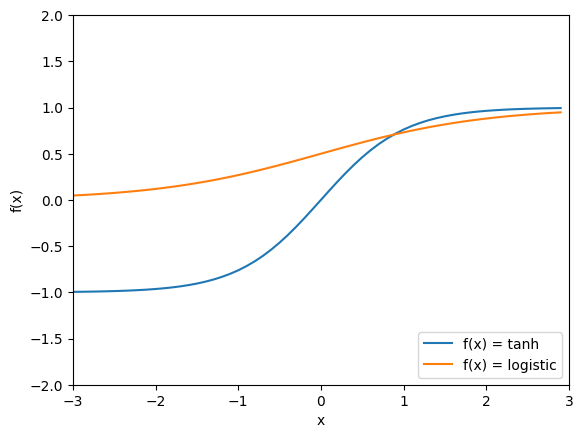

In [3]:
x1 = np.arange(-3,3,0.1)
x0 = np.array([1]*len(x1))
x = np.vstack((x0,x1))
z1 = np.matmul(np.array([0,1]),x)

plt.plot(x1,(np.exp(z1) - np.exp(-z1)) / (np.exp(z1) + np.exp(-z1)) )
plt.plot(x1,(1 / (1 + np.exp(-z1)) ) )
plt.xlim([-3,3])
plt.ylim([-2,2])
plt.ylabel("f(x)")
plt.xlabel("x")
plt.legend(['f(x) = tanh','f(x) = logistic'], loc='lower right')
plt.show()

As we can see from the above the slope of the tanh function is considerably more severe than the slope of the sigmoid function. Technically this means that the derivative of the tanh function has larger values than is the case for the logistic function for the same input values and model parameters. We can show that below numerically:

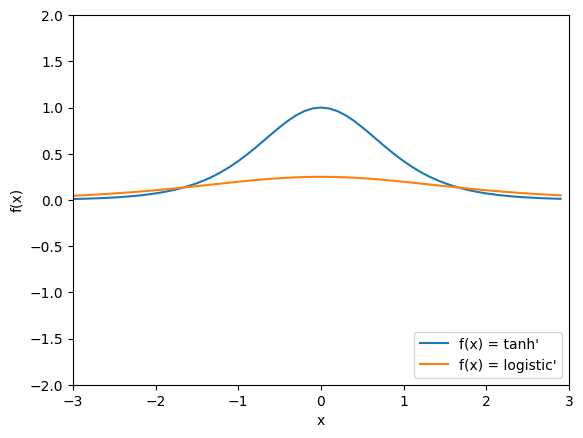

In [4]:
x1 = np.arange(-3,3,0.1)
x0 = np.array([1]*len(x1))
x = np.vstack((x0,x1))
z1 = np.matmul(np.array([0,1]),x)

plt.plot(x1,1 - (np.tanh(z1))**(2))
plt.plot(x1,np.exp(-z1) / (1 + np.exp(-z1))**2 )
plt.xlim([-3,3])
plt.ylim([-2,2])
plt.ylabel("f(x)")
plt.xlabel("x")
plt.legend(['f(x) = tanh\'','f(x) = logistic\''], loc='lower right')
plt.show()

In many sources it is noted that networks based on the tanh activation function tend to converge faster than is the case for networks based on the logistic activation function. This is primarily due to the more severe error surface slopes which allow error minima to be reached faster.

Regarding the faster convergence, we can investigate this empirically by comparing logistic and tanh performance.

To do this we first redefine our Backpropagation class, but in this case facilitate the selection of either logistic or hyperbolic tangent activation functions for our units. In doing this we need to provide implementations of the activation function itself for forward propagation and implementations of $g'(z)$ for back propagation. At this point we continue to use the squared error loss function for calculating overall error at the output layer of our network.

In [5]:
# In this implementation we force all vectors to be true 2D arrays with 1 column rather than
# numpy 1D arrays. This makes it easier to use matirx operations.

def celf_(y,a):
    if y == 1:
        return -np.log(a)
    elif y == 0:
        return -np.log(1-a)

celf = np.vectorize(celf_)

class Backpropogation:

    def __init__(self,x,y,s,cost="mse",a="tanh"):
        # set class references to X, Y, S and the activation function
        self.X = x
        self.Y = y
        self.S = s
        self.cost = cost
        if a == "logistic" or a == "tanh":
            self.activation = a
        else:
            raise ValueError("Unknown activation type " + str(a))
        # Define empty arrays for activation
        self.a     =  [None] * len(self.S)
        # Define empty array for z values (i.e., inputs)
        self.z     =  [None] * len(self.S)
        # Define empty arrays for weights
        self.theta =  [None] * len(self.S)
        # Define empty array for error derivitives for indivual units
        self.delta =  [None] * len(self.S)
        # Define empty arrays for accumulated errors on weights
        self.Delta =  [None] * len(self.S)

        # Initialize the weights for all layers
        for idx, val in enumerate(self.S):
            if idx == (len(self.S)-1): # ouput layer has no weights
                break
            self.theta[idx] = np.random.rand( self.S[idx]+1,self.S[idx+1])

    # Calculate the cost
    def calcCost(self,a,y):
        if self.cost == "mse":
            return np.sum(np.multiply(0.5,(a-y)**2))
        elif self.cost == "celf":
            return np.sum(celf(y,a))
        else: print("Error - no cost function selected")

    # calculate the activation values given an input
    def calcActivation(self,z):
        if self.activation == "logistic":
            return 1 / (1 + np.exp(-z))
        elif self.activation == "tanh":
            return np.tanh(z) # directly using numpy implementation
        else: print("Error - no activation function selected")

    # calculate ∂a/∂z
    def calcGPrimeZ(self,a):
        # Note that these implementations take advantage of the cached values for the activations
        # of each layer. if we did not have this cached values we would have to use the longer form
        # functions of z, i.e.,
        # 1 / (1 + exp(-z))
        # 1 - tanh(z)**2
        if self.activation == "logistic":
            return np.multiply(a,(1 - a))
        elif self.activation == "tanh":
            return 1.0 - a**2
        else: print("Error - no activation function selected")

    def forwardProp(self,x):
        # Forward propogate activation
        # For each layer from input to output
        for idx, val in enumerate(self.S):
            if idx == 0:
                # construct the activation values for the input layer from X and a bias value
                self.a[idx] = np.atleast_2d(np.hstack(([1.0],x))).T
            elif idx == (len(self.S)-1):
                # calculate z for the output layer
                self.z[idx] = np.atleast_2d(np.matmul(self.theta[idx-1].T,self.a[idx-1]))
                # calculate the activation values
                self.a[idx] = self.calcActivation(self.z[idx])
            else:
                # calculate z for a hidden layer
                self.z[idx] = np.atleast_2d(np.matmul(self.theta[idx-1].T,self.a[idx-1]))
                # calculate a for a hidden layer
                self.a[idx] = np.vstack(([1.0],self.calcActivation(self.z[idx])))
        # return the actual output values for the output layer
        return self.a[len(self.S)-1]

    def predict(self,X):
        results = []
        for datum in X:
            results.append(self.forwardProp(datum))
        return np.squeeze(results)

    def backwardProp(self,y):
        # For each layer from output to input
        for idx, val in reversed(list(enumerate(self.S))):
            if idx == (len(self.S)-1):
                if self.cost == "mse":
                    # calculate ∂a/∂z for the output layer
                    gprimez = self.calcGPrimeZ(self.a[idx])

                    # ∂E/∂zⱼ
                    self.delta[idx] = np.multiply(self.a[idx] - np.atleast_2d(y).T,gprimez)
                elif self.cost == "celf":
                    # ∂E/∂zⱼ
                    self.delta[idx] = -(np.atleast_2d(y).T - self.a[idx])
                else: print("Error - no cost function selected")
            elif idx == 0:
                # we need to update the weights in the 0th layer but we don't propogate error
                # derivitive back to the input units.
                self.Delta[idx] = self.Delta[idx] + np.matmul(self.delta[idx+1],self.a[idx].T).T
            else:
                # calculate the error for all other layers

                # 1. calculate the derivitive of g(z)
                gprimez = self.calcGPrimeZ(self.a[idx])

                # 2. calculate the error associatd with each node in the current layer.
                self.delta[idx] = np.multiply(np.matmul(self.theta[idx],self.delta[idx+1]),gprimez)

                # get rid of the bias unit
                self.delta[idx] = self.delta[idx][1:,:]

                # 3. update the accumulated change
                self.Delta[idx] = self.Delta[idx] + np.matmul(self.delta[idx+1],self.a[idx].T).T

        return self.calcCost(self.a[len(self.S)-1],np.atleast_2d(y).T)

    def train(self,epochs):
        errors = []
        # For each training epoch
        for k in range(epochs):
            error = 0
            # Initialize Delta for this epoch
            for idx, val in enumerate(self.S):
                if idx < (len(self.S)-1): # ouput layer has no weights
                    self.Delta[idx] = np.zeros((self.S[idx]+1,self.S[idx+1]))
            # Iterate over all training examples
            for i, y in enumerate(self.Y):
                self.forwardProp(self.X[i])
                error += self.backwardProp(y)
            errors.append(error)
            # For each layer from output to input
            for idx, val in reversed(list(enumerate(self.S))):
                if idx < (len(self.S)-1):
                    # Update the weights
                    self.theta[idx] = self.theta[idx] - (1/len(self.Y)) * self.Delta[idx]
        return errors

    def test(self):
        for i, y in enumerate(self.Y):
            output = self.forwardProp(self.X[i])
            print(self.X[i])
            print(y)
            print(output)
            print("Error is " + str(self.calcCost(output,np.atleast_2d(y).T)))
            print("---")

We can test our implementation for both logistic and tanh activation values.

Time taken for Logistic: 19.161174074


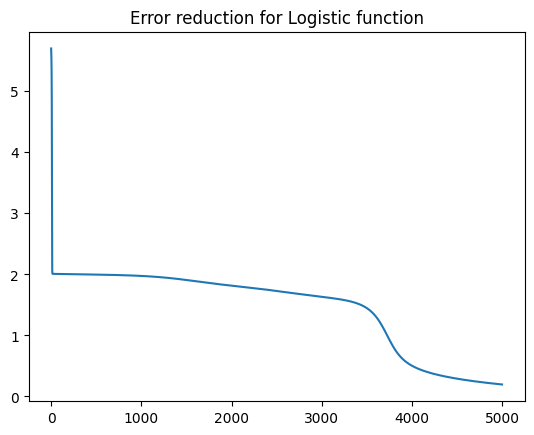

Time taken for Tanh: 21.234593743000005


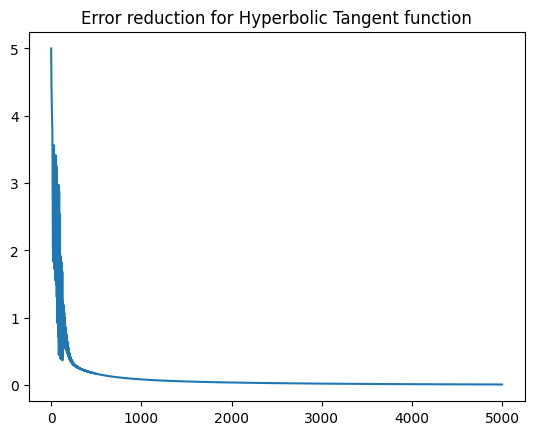

In [6]:
# Define the training data
Y = np.array([ 0,0,0,0,0,       1,1,1,  0,0,    1,1,1,     0,0,0,0,0])
X1 = np.array([4,6,1,9,1,       4,5,6,  9,1,    4,5,6,     9,1,9,4,6])
X2 = np.array([0,0,1,1,2,       2,2,2,  2,3,    3,3,3,     3,4,4,5,5])
X = np.vstack((X1,X2)).T

# standardize our input features
X, means, stds = standardize(X)

# Define the number of (visible) units in each layer
s = [2,8,8,1]

import time
start = time.perf_counter()
# Instantiate the network with data and topology, before running training
bp = Backpropogation(X,Y,s,cost="mse",a="logistic")
errors = bp.train(5000)
print("Time taken for Logistic: " + str(time.perf_counter() - start))

# Visualize Error over Epochs
fig = plt.figure()
plt.plot(errors)
plt.title("Error reduction for Logistic function")
plt.show()

start = time.perf_counter()
# Instantiate the network with data and topology, before running training
bp = Backpropogation(X,Y,s,cost="mse",a="tanh")
errors = bp.train(5000)
print("Time taken for Tanh: " + str(time.perf_counter() - start))

# Visualize Error over Epochs
plt.plot(errors)
plt.title("Error reduction for Hyperbolic Tangent function")
plt.show()

From the above we see three important things.

First it is clear that the tanh function converges on a good result much faster than the logistic implementation. By 500 iterations tanh has converged on a good result, while at 5000 iterations the logistic version has still not reached the same low value.

Also in terms of computational cost we see that the tanh implementation takes broadly the same amount of time as the logistic implementation. In fact the tanh implementation seems to narrowly outperform the logistic form over the same number of epochs.

The final note is that the tanh implementation does however seem to be less stable than the logistic function. there are wide jumps in error values for the first 500 iterations of the tanh activation. This is likely due to the more severe gradient of the tanh function leading our solution to jump around the cost space more. A reduction in learning rate would help to reduce this instability but this of course would then mean that the error minimum would have to be reached over a greater number of epochs.

Clearly the tanh activation function seems very useful. In practice however we still see that the logistic function is used frequently - particularly in example code. One reason for the prevalence of the logistic function is simply that it is so fundamental across Machine Learning and statistics. Logistic regression is based around the logistic function and neural networks are usually introduced as an extension of logistic regression.

It is worth noting that since the tanh function has output in [-1,1] rather than [0,1], it is not a natural fit for an output layer. For an output layer we will often use a different type of layer which specifically has outputs that are suitable to our problem at hand (remember for example the softmax function).

## Rectified Linear Neurons

Probably the most commonly encountered neuron in Deep Network implementations is the Rectified Linear Neuron or RELU. The Rectified Linear Neuron relies on a non-linear and non-symmetric activation function defined as:

\begin{equation}
  g(z) = max(0,z)
\end{equation}

i.e., g(z) returns the value z for any values of z above 0 and returns 0 for all other values. This can be visualized below.

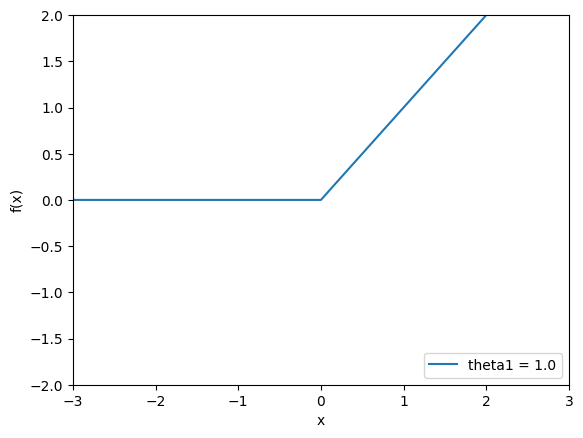

In [7]:
x1 = np.arange(-3,3,0.1)
x0 = np.array([1]*len(x1))
x = np.vstack((x0,x1))
z1 = np.matmul(np.array([0,1]),x)

plt.plot(x1,np.maximum(0,z1))
plt.xlim([-3,3])
plt.ylim([-2,2])
plt.ylabel("f(x)")
plt.xlabel("x")
plt.legend(['theta1 = 1.0'], loc='lower right')
plt.show()

We can see from the above that the Rectified Linear function has a very different profile to either Logistic or Tanh functions, and that unusual profile results in a derivative which unsurprisingly is not smooth.

The derivative of the Rectified Linear Unit can be characterized as being equal to 0 when $g(z) < 0$, 1 when $g(z) > 0$ and undefined where $g(z) = 0$. In practice we usually say that the derivative is 0 where $g(z) = 0$ though this is technically not true. Thus we can usually define $g'(z)$ as follows:

$
g'(z)=
\begin{cases}
0 & if \; g(z) <= 0\\
1 & if \; g(z) > 0
\end{cases}
$

A visualization of the derivative (given below) shows that this is essentially a step function.

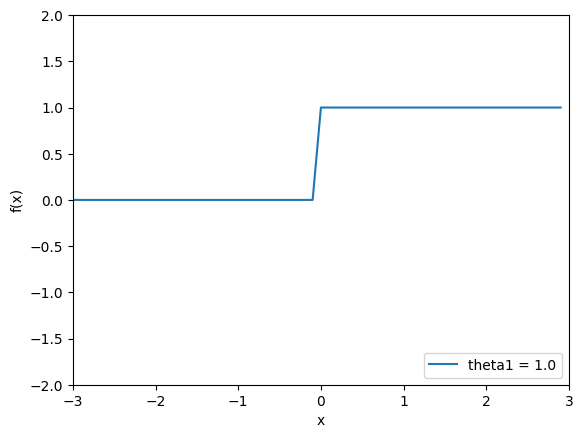

In [8]:
x1 = np.arange(-3,3,0.1)
x0 = np.array([1]*len(x1))
x = np.vstack((x0,x1))
z1 = np.matmul(np.array([0,1]),x)

def g(z):
    return 0 if z <= 0 else 1
g = np.vectorize(g)

plt.plot(x1,g(z1))
plt.xlim([-3,3])
plt.ylim([-2,2])
plt.ylabel("f(x)")
plt.xlabel("x")
plt.legend(['theta1 = 1.0'], loc='lower right')
plt.show()

Given the Rectified Linear Neuron seems to have such different properties to either the Tanh or Logistic units it can seem surprising that we can use it with gradient descent style optimization.

The fact that the Rectified Linear Neuron works at all can be understood as a consequence of one interpretation of the Rectified Linear Function. Essentially the Rectified Linear function can be interpreted as a summation of many different instances of logistic functions with different offsets. To see this we can simply total the results of the logistic for a number of different offsets and plot that against x.

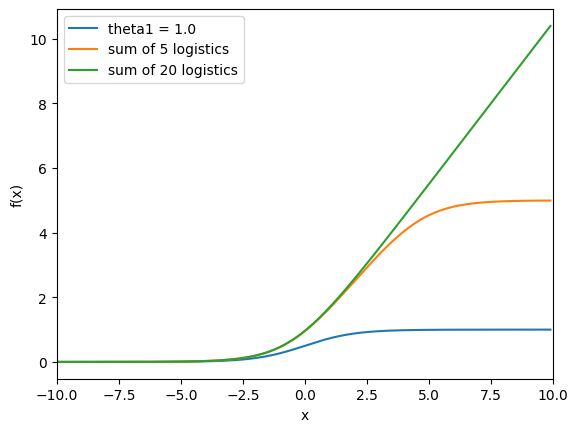

In [9]:
x1 = np.arange(-10,10,0.1)
x0 = np.array([1]*len(x1))
x = np.vstack((x0,x1))
z1 = np.matmul(np.array([0,1]),x)

def logistic(z):
    return 1 / (1 + np.exp(-z))

totals = np.zeros(len(x0))
totals2 = np.zeros(len(x0))
offsets = np.arange(0,5,1)
for o in offsets:
    totals = totals + logistic(z1 - o)

offsets = np.arange(0,20,1)
for o in offsets:
    totals2 = totals2 + logistic(z1 - o)

plt.plot(x1,logistic(z1))
plt.plot(x1,totals)
plt.plot(x1,totals2)
plt.xlim([-10,10])
plt.ylabel("f(x)")
plt.xlabel("x")
plt.legend(['theta1 = 1.0', 'sum of 5 logistics', 'sum of 20 logistics'], loc='upper left')
plt.show()

The actual summation of a number of different logistic units is given by the equation

\begin{equation}
g(z) = log(1 + e^{z})
\end{equation}

The rectified function is seen as a generalization of that function that does not require the calculation of the log or exponential function and is thus computationally easier to compute.

Clearly though the rectified function and its derivative are not computationally elegant in the normal sense. So the question remains, does it work despite this? The easiest way to determine this is to extend our implementation from above to include the Rectified Linear activation for forward propagation, and the derivative of this activation function with respect to the logit for back propagation.

In implementing Rectified Linear Units we must however pay attention to how we initialize the network. In short different activation functions prefer different forms of weight initialization. For the Rectified Linear Unit we should initialize the weights on our biases to 0 and evenly distribute the weight space for all other units between something like -0.5 and 0.5. We do this below by introducing different initializations for different types of layers.

In [10]:
# In this implementation we force all vectors to be true 2D arrays with 1 column rather than
# numpy 1D arrays. This makes it easier to use matirx operations.

def celf_(y,a):
    if y == 1:
        return -np.log(a)
    elif y == 0:
        return -np.log(1-a)

celf = np.vectorize(celf_)

class Backpropogation:

    def __init__(self,x,y,s,layers,cost="mse"):
        # set class references to X, Y, S and the activation function
        self.X = x
        self.Y = y
        self.S = s
        self.cost = cost
        if len(layers) == len(s) - 1:
            self.layers = ["None"] + layers
        else:
            raise ValueError("len(layers) != len(s) - 1")
        # Define empty arrays for activation
        self.a     =  [None] * len(self.S)
        # Define empty array for z values (i.e., inputs)
        self.z     =  [None] * len(self.S)
        # Define empty arrays for weights
        self.theta =  [None] * len(self.S)
        # Define empty array for error derivitives for indivual units
        self.delta =  [None] * len(self.S)
        # Define empty arrays for accumulated errors on weights
        self.Delta =  [None] * len(self.S)

        # Randomly Initialize the weights for all layers
        for idx, val in enumerate(self.S):
            if idx == (len(self.S)-1): # ouput layer has no weights
                break
            if layers[idx] == "tanh":
                self.theta[idx] = np.random.rand( self.S[idx]+1,self.S[idx+1]) - 0.5
            elif layers[idx] == "logistic":
                self.theta[idx] = np.random.rand( self.S[idx]+1,self.S[idx+1])
            elif layers[idx] == "relu":
                self.theta[idx] = np.random.rand( self.S[idx]+1,self.S[idx+1]) - 0.5
                self.theta[idx][0,:] = 0.0
            else:
                print("Error - unknown initialization for layer : " + layers[idx])

    # Calculate the cost
    def calcCost(self,a,y):
        if self.cost == "mse":
            return np.sum(np.multiply(0.5,(a-y)**2))
        elif self.cost == "celf":
            return np.sum(celf(y,a))
        else: print("Error - no cost function selected")

    # calculate the activation values given an input
    def calcActivation(self,z,activation):
        if activation == "logistic":
            return 1 / (1 + np.exp(-z))
        elif activation == "tanh":
            return np.tanh(z) # directly using numpy implementation
        elif activation == "relu":
            return np.maximum(0,z)
        else: print("Error - unknown activation function : " + str(activation))

    def calcGPrimeZ(self,a,activation):
        # Note that these implementations take advantage of the cached values for the activations
        # of each layer. if we did not have this cached values we would have to use the longer form
        # functions of z, i.e.,
        # 1 / (1 + exp(-z))
        # 1 - tanh(z)**2
        if activation == "logistic":
            return np.multiply(a,(1 - a))
        elif activation == "tanh":
            return 1.0 - a**2
        elif activation == "relu":
            temp = np.zeros(a.shape)
            temp[a > 0] = 1
            return temp
        else: print("Error - unknown activation function : " + str(activation))

    def forwardProp(self,x):
        # Forward propogate activation
        # For each layer from input to output
        for idx, val in enumerate(self.S):
            if idx == 0:
                # construct the activation values for the input layer from X and a bias value
                self.a[idx] = np.atleast_2d(np.hstack(([1.0],x))).T
            elif idx == (len(self.S)-1):
                # calculate z for the output layer
                self.z[idx] = np.atleast_2d(np.matmul(self.theta[idx-1].T,self.a[idx-1]))
                # calculate the activation values
                self.a[idx] = self.calcActivation(self.z[idx],self.layers[idx])
            else:
                # calculate z for a hidden layer
                self.z[idx] = np.atleast_2d(np.matmul(self.theta[idx-1].T,self.a[idx-1]))
                # calculate a for a hidden layer
                self.a[idx] = np.vstack(([1.0],self.calcActivation(self.z[idx],self.layers[idx])))
        # return the actual output values for the output layer
        return self.a[len(self.S)-1]

    def predict(self,X):
        results = []
        for datum in X:
            results.append(self.forwardProp(datum))
        return np.squeeze(results)

    def backwardProp(self,y):
        # For each layer from output to input
        for idx, val in reversed(list(enumerate(self.S))):
            if idx == (len(self.S)-1):
                if self.cost == "mse":
                    # calculate ∂a/∂z for the output layer
                    gprimez = self.calcGPrimeZ(self.a[idx],self.layers[idx])

                    # ∂E/∂zⱼ
                    self.delta[idx] = np.multiply(self.a[idx] - np.atleast_2d(y).T,gprimez)
                elif self.cost == "celf":
                    # ∂E/∂zⱼ
                    self.delta[idx] = -(np.atleast_2d(y).T - self.a[idx])
                else: print("Error - no cost function selected")
            elif idx == 0:
                # we need to update the weights in the 0th layer but we don't propogate error
                # derivitive back to the input units.
                self.Delta[idx] = self.Delta[idx] + np.matmul(self.delta[idx+1],self.a[idx].T).T
            else:
                # calculate the error for all other layers

                # 1. calculate the derivitive of g(z)
                gprimez = self.calcGPrimeZ(self.a[idx],self.layers[idx])

                # 2. calculate the error associatd with each node in the current layer.
                self.delta[idx] = np.multiply(np.matmul(self.theta[idx],self.delta[idx+1]),gprimez)

                # get rid of the bias unit
                self.delta[idx] = self.delta[idx][1:,:]

                # 3. update the accumulated change
                self.Delta[idx] = self.Delta[idx] + np.matmul(self.delta[idx+1],self.a[idx].T).T

        return self.calcCost(self.a[len(self.S)-1],np.atleast_2d(y).T)

    def train(self,epochs):
        errors = []
        # For each training epoch
        for k in range(epochs):
            error = 0
            # Initialize Delta for this epoch
            for idx, val in enumerate(self.S):
                if idx < (len(self.S)-1): # ouput layer has no weights
                    self.Delta[idx] = np.zeros((self.S[idx]+1,self.S[idx+1]))
            # Iterate over all training examples
            for i, y in enumerate(self.Y):
                self.forwardProp(self.X[i])
                error += self.backwardProp(y)
            errors.append(error)
            # For each layer from output to input
            for idx, val in reversed(list(enumerate(self.S))):
                if idx < (len(self.S)-1):
                    # Update the weights
                    self.theta[idx] = self.theta[idx] - (1/len(self.Y)) * self.Delta[idx]
        return errors

    def test(self):
        for i, y in enumerate(self.Y):
            output = self.forwardProp(self.X[i])
            print(self.X[i])
            print(y)
            print(output)
            print("Error is " + str(self.calcCost(output,np.atleast_2d(y).T)))
            print("---")

We can test our implementation by training the multivariate function as shown below.

Time taken for RELU training: 0.8741936629999998


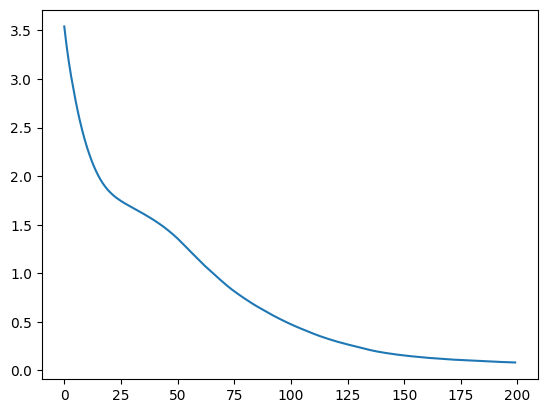

In [11]:
# Define the training data
Y = np.array([ 0,0,0,0,0,       1,1,1,  0,0,    1,1,1,     0,0,0,0,0])
X1 = np.array([4,6,1,9,1,       4,5,6,  9,1,    4,5,6,     9,1,9,4,6])
X2 = np.array([0,0,1,1,2,       2,2,2,  2,3,    3,3,3,     3,4,4,5,5])
X = np.vstack((X1,X2)).T

# standardize our input features
X, means, stds = standardize(X)

# Plot the training data in our usual way where the Target variable occupies the z-axis
fig = plt.figure()

# Define the number of (visible) units in each layer
s = [2,8,8,1]

# Define the layer types
layers = ["relu","relu","logistic"]

start = time.perf_counter()
# Instantiate the network with data and topology, before running training
bp = Backpropogation(X,Y,s,layers)
errors = bp.train(200)
print("Time taken for RELU training: " + str(time.perf_counter() - start))

# Visualize Error over Epochs
plt.plot(errors)
plt.show()

RELUs naturally lead to sparse activation. In a randomly initialized network half of the inputs to a unit will be less than 0 and hence half of the activation values will be null. This along with the 0 valued derivative means that more independent sub-networks tend to be learned. These sub-networks train on specific features of the input independently. Also the vanishing gradient problem - frequently troubling in very deep networks or recurrent networks - is less of an issue. For this reason the Rectified Linear Unit is currently the most popular unit basic unit type for Deep Learning.

As noted above, care must be taken with the initialization of Rectified Linear Unit weights. While our approach above will suffice for some examples the problem is relatively complex and was one of the reasons that pre-training of networks was required for Deep Neural Networks until recently. The change which allowed deep Rectified Linear Units to be applied has been credited to the Xavier algorithm which given the number of input and output units in a network performs an appropriate weight initialization for deep layers to ensure just enough signal propagates through the network. We do not go into the details of the Xavier algorithm here, but note that it is applied in practical Deep Neural Network implementations.

## Preventing Overfitting

While all the methods considered do help to improve training, they can also lead to overfitting of our model to the data. As we saw for Linear Regression and Logistic Regression this is a major problem which can allow us to falsely believe our model is a good all purpose model when in fact all we have done is memorized the data.

Below we will introduce a number of different methods which can be used to reduce the chances of overfitting to our training data. In so doing we will migrate from our use of our vanilla Backpropogation implementation to use TensorFlow more consistently for illustration purposes. As such the code examples are often now not as deep as previously, but hopefully at this stage you can start to have a good idea of what is happening 'below the hood'.


## Regularization
Linear Regression can be prone to overfitting data if too much freedom is provided to the model. This freedom is usually introduced through multiple features that allow the model to over-learn the data and make specific decisions where no decisions should be made.

### The Problem
To illustrate consider again our example of height versus age data, but in this case we eliminate a couple of data points for the sake of clarity. We then compare the models fitted based on the original features, the 2nd and 3rd order polynomial features, and then a model with much higher order polynomials included.

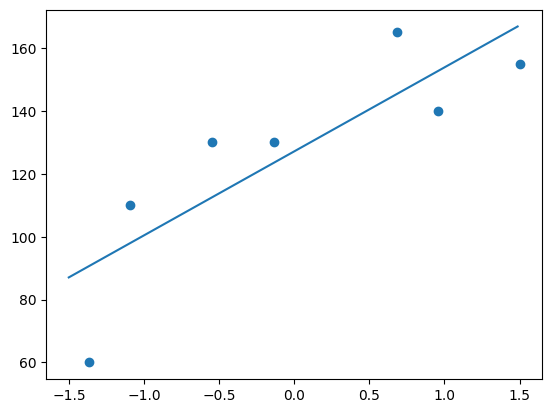

In [12]:
Y = np.array([60,110,130,130,165,140,155])
x1 = np.array([1,3,7,10,16,18,22])

# standardize our input features
X, means, stds = standardize(x1)

# define initial values for theta
rows, cols = len(X),1
theta = np.ones(1+cols)*1
theta[0] = np.mean(Y) # remember - we directly calculate t0

# set min_delta and a
md = 0.01
a = 0.05

# define the new matrix X based around our standardized vector for X previously obtained
x_0 = np.array([1]*rows)
X = np.hstack((x_0[:, np.newaxis],X[:, np.newaxis]))

# Run gradient descent
thetas,costs = gd(theta,md,a,X,Y,hLinear)

# Generate data for visualizing our optimized function
x1s = np.arange(0,22,0.1)
xs = np.vstack((x1s)).T

# standardize our input features
xs =  (xs-means)/stds

# define the new matrix X based around our standardized vector for X previously obtained
x_0 = np.array([1]*len(x1s))
xs = np.hstack((x_0[:, np.newaxis],xs.T))

# calculate y values based on this generated data and results of optimization
ys = np.matmul(thetas[-1,:],xs.T)

# plot training points and function over generated data
plt.scatter(X[:,1],Y)
plt.plot(xs[:,1],ys)
plt.show()

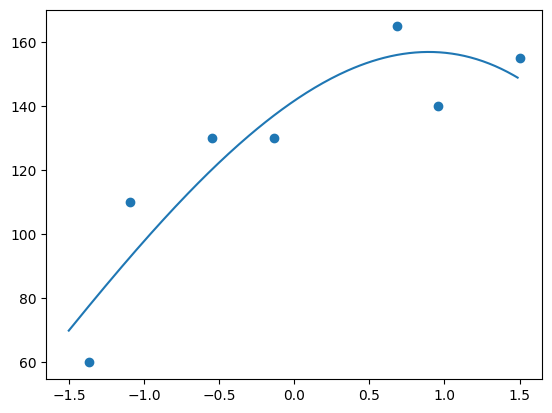

In [13]:
Y = np.array([60,110,130,130,165,140,155])
x1 = np.array([1,3,7,10,16,18,22])
x2 = x1**2
x3 = x1**3
X = np.vstack((x1,x2,x3)).T

# standardize our input features
X, means, stds = standardize(X)

# define initial values for theta
rows, cols = X.shape
theta = np.ones(1+cols)*1
theta[0] = np.mean(Y) # remember - we directly calculate t0

# set min_delta and a
md = 0.01
a = 0.05

# define the new matrix X based around our standardized vector for X previously obtained
x_0 = np.array([1]*rows)
X = np.hstack((x_0[:, np.newaxis],X))

# Run gradient descent
thetas,costs = gd(theta,md,a,X,Y,hLinear)

# Generate data for visualizing our optimized function
x1s = np.arange(0,22,0.1)
x2s = x1s**2
x3s = x1s**3
xs = np.vstack((x1s,x2s,x3s)).T

# standardize our input features
xs =  (xs-means)/stds

# define the new matrix X based around our standardized vector for X previously obtained
x_0 = np.array([1]*len(x2s))
xs = np.hstack((x_0[:, np.newaxis],xs))

# calculate y values based on this generated data and results of optimization
ys = np.matmul(thetas[-1,:],xs.T)

# plot training points and function over generated data
plt.scatter(X[:,1],Y)
plt.plot(xs[:,1],ys)
plt.show()

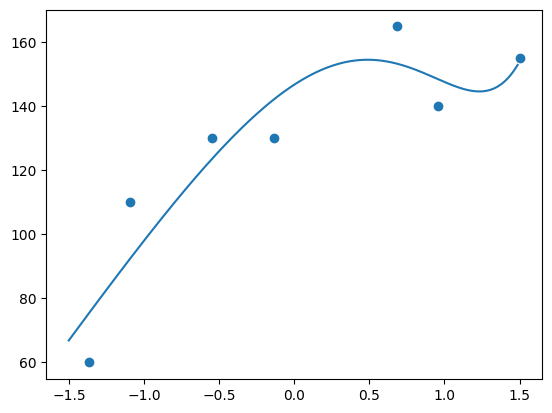

In [14]:
Y = np.array([60,110,130,130,165,140,155])
x1 = np.array([1,3,7,10,16,18,22])
x2 = x1**2
x3 = x1**3
x4 = x1**4
x5 = x1**5
x6 = x1**6
x7 = x1**7
x8 = x1**8
x9 = x1**9
x10 = x1**10
X = np.vstack((x1,x2,x3,x4,x5,x6,x7,x8,x9,x10)).T

# standardize our input features
X, means, stds = standardize(X)

# define initial values for theta
rows, cols = X.shape
theta = np.ones(1+cols)*1
theta[0] = np.mean(Y) # remember - we directly calculate t0

# set min_delta and a
md = 0.01
a = 0.05

# define the new matrix X based around our standardized vector for X previously obtained
x_0 = np.array([1]*rows)
X = np.hstack((x_0[:, np.newaxis],X))

# Run gradient descent
thetas,costs = gd(theta,md,a,X,Y,hLinear)

# Generate data for visualizing our optimized function
x1s = np.arange(0,22,0.1)
x2s = x1s**2
x3s = x1s**3
x4s = x1s**4
x5s = x1s**5
x6s = x1s**6
x7s = x1s**7
x8s = x1s**8
x9s = x1s**9
x10s = x1s**10
xs = np.vstack((x1s,x2s,x3s,x4s,x5s,x6s,x7s,x8s,x9s,x10s)).T

# standardize our input features
xs =  (xs-means)/stds

# define the new matrix X based around our standardized vector for X previously obtained
x_0 = np.array([1]*len(x2s))
xs = np.hstack((x_0[:, np.newaxis],xs))

# calculate y values based on this generated data and results of optimization
ys = np.matmul(thetas[-1,:],xs.T)

# plot training points and function over generated data
plt.scatter(X[:,1],Y)
plt.plot(xs[:,1],ys)
plt.show()

Given the features provided the model on the bottom is technically a better fit to the data but is typical of a problem of overfitting. To balance against overfitting - or **high model variance** - we have two options:
 1. Reduce the number of features through **feature selection** or similar mechanism
 2. Introduce a penalty that penalizes strong parameters unless they are really needed

Here we are looking at the second option which is referred to as **Regularization**. In short for regularization we introduce an extra term that penalizes extreme values for our parameters $\theta$. By forcing values of $\theta$ to be as small as possible we are encouraging values for $\theta > 1$ when and only when they are really needed.

### The Regularization Term
To introduce regularization we must modify our cost function such to penalize high weights / values for $\theta$. We do this by introducing an extra term that adds a cost for each of our weights. The form of this **regularization term** is:

\begin{equation}
\lambda \sum_{j=1}^{n} \theta_{i}^{2}
\end{equation}

where:
 * $\lambda$ is the penalty or **regularization parameter**
 * our sum goes over all parameters apart from $\theta_{0}$
 * $n$ is the number of parameters, or weights, in our model

Our summation goes from 1 to n rather than from 0 to n. This is because we do not introduce a penalty for $\theta_{0}$. This is due to the meaning we assigned to the $0^{th}$ weight above, i.e., it is interpreted as providing the y intercept. This is a well defined parameter which we do not want to penalize for having large values. After all the y intercept could have a very large value for a good reason based on the data and we have no reason to bias our model towards small values for this weight.

In our penalization term above it is worth noting that we sum over the square of the weights rather than the weights themselves. In this case the square is used to facilitate a clean derivative of an expanded cost function for gradient descent.

### Linear Cost Function with Regularization Term
Given our regularization term, our full Linear Regression Cost Function now becomes:

\begin{equation}
J(\theta) = \frac{1}{2m} \Bigg[    \sum_{i=0}^{m}  (h_{\theta}(x^{(i)}) - y^{(i)})^{2}  + \lambda \sum_{j=1}^{n} \theta_{j}^{2} \Bigg]
\end{equation}

Note that in the above the first summation is over all training examples, while the second summation is over all weights. Thus our new cost function has two very different contributions which will combine in a more complex weight space.

The selection of the parameter $\lambda$ is the most important criteria when using regularization. When $\lambda$ is large the effect is to force all parameters towards 0 which results in models that take almost no account of features. The value of $\lambda$ is dataset specific and is often best achieved through cross validation methods.

#### Aside  
This form of regularization is called **L2 regularization** or **Ridge Regression**. There are other forms of regularization such as L1 regularization, aka lasso. L1 regularization is performed using the absolute value of weights rather than their squares, but hence results in a non-smooth error surface. The disadvantage of L1 is that it it mathematically more difficult to achieve within the Gradient Descent framework that we are considering here. The main advantage however is that it allows some parameters to go to 0. This is very nice as it results in sparse or compacted models with fewer active parameters.

### Regularization for the Gradient Descent Algorithm
Remember that Gradient Descent uses the derivative of the Cost Function rather than the Cost Function itself. Since we used a squared parameter, the partial derivative of the Regularization Term is simply $\lambda \theta_{j}$.

To introduce this to our Gradient Descent Algorithm let us first re-consider the two parallel gradient update steps we used before introducing the vectorized notation:

\begin{equation}
\theta_{0} = \theta_{0} - \alpha \frac{1}{m} \sum_{i=0}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})
\end{equation}

\begin{equation}
\theta_{j} = \theta_{j} - \alpha \frac{1}{m} \sum_{i=0}^{m} (h_{\theta}(^{(i)}) - y^{(i)}).x_{j}^{i}
\end{equation}

Noting that regularization is not applied to $\theta_{0}$ we can add the regularization term to the second equation above to get:

\begin{equation}
\theta_{j} = \theta_{j} - \alpha \frac{1}{m} \bigg[  \sum_{i=0}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}).x_{j}^{i}  - \lambda \theta_{j} \bigg]
\end{equation}

Note that by convention we also average our regularization term by the number of training cases. We can tidy up the above to the following;

\begin{equation}
\theta_{j} = \theta_{j} \bigg(1 - \alpha \frac{\lambda}{m} \bigg)  -  \alpha \frac{1}{m}  \sum_{i=0}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}).x_{j}^{i}  
\end{equation}

Note that by default the term $(1 - \alpha \frac{\lambda}{m})$ will always be slightly less than 1. The effect of this is that this left hand term will act to reduce the parameter over time. This reduction must be positively overcome by the right hand term which can act to increase the parameter value.

Integrating this into our algorithm for gradient descent we get:

Repeat Until Convergence {

  > perform simultaneously {
\begin{equation}
\theta_{0} = \theta_{0} - \alpha \frac{1}{m} \sum_{i=0}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})
\end{equation}

> \begin{equation}
\theta_{j} = \theta_{j} \bigg(1 - \alpha \frac{\lambda}{m} \bigg)  -  \alpha \frac{1}{m}  \sum_{i=0}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}).x_{j}^{i}  
\end{equation}
  }
  
}

which we can implement straightforwardly as follows:

In [15]:
def gd(theta_in,min_delta_in,a_in,X_in,Y_in,lambda_in):
    m = len(Y_in) # number of training examples
    _ , n = np.shape(X_in) # number of features

    theta = theta_in
    thetas = np.array(theta_in,ndmin=2)

    while True:
        temp = np.copy(theta)
        for j in range(0,n):
            # making calculations for jth parameter
            s = 0
            for i in range(0,m):
                s+=  (np.matmul(temp.T,np.ravel(X_in[i,:])) - Y_in[i])  * X_in[i,j]
            if j == 0:
                theta[j] = temp[j] - a_in * (1/m) * s
            else:
                theta[j] = temp[j]*(1 - a_in * (lambda_in / m)) - a_in * (1/m) * s
        thetas = np.vstack((thetas,theta))

        progressing = False
        for j in range(0,n):
            if(abs(temp[j] - theta[j]) > min_delta_in):
                progressing = progressing | True
        if not progressing: break
    return thetas

Selecting a value of 0.5 for $\lambda$ we can test this new implementation with our overfitting examples from above as follows:

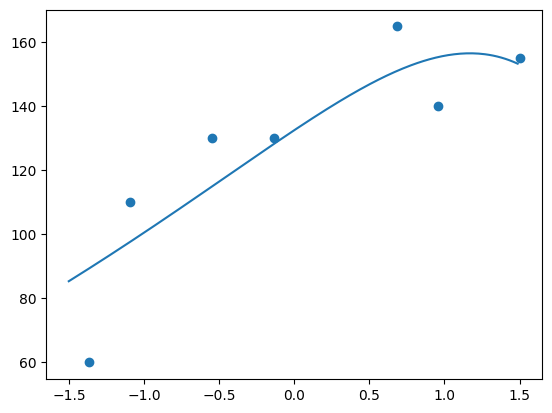

In [16]:
Y = np.array([60,110,130,130,165,140,155])
x1 = np.array([1,3,7,10,16,18,22])
x2 = x1**2
x3 = x1**3
x4 = x1**4
x5 = x1**5
x6 = x1**6
x7 = x1**7
x8 = x1**8
x9 = x1**9
x10 = x1**10
X = np.vstack((x1,x2,x3,x4,x5,x6,x7,x8,x9,x10)).T

# standardize our input features
X, means, stds = standardize(X)

# define initial values for theta
rows, cols = X.shape
theta = np.ones(1+cols)*1
theta[0] = np.mean(Y) # remember - we directly calculate t0

# set min_delta and a
md = 0.01
a = 0.05

# define the new matrix X based around our standardized vector for X previously obtained
x_0 = np.array([1]*rows)
X = np.hstack((x_0[:, np.newaxis],X))

# Run gradient descent
lmbda = 0.5
thetas = gd(theta,md,a,X,Y,lmbda)

# Generate data for visualizing our optimized function
x1s = np.arange(0,22,0.1)
x2s = x1s**2
x3s = x1s**3
x4s = x1s**4
x5s = x1s**5
x6s = x1s**6
x7s = x1s**7
x8s = x1s**8
x9s = x1s**9
x10s = x1s**10
xs = np.vstack((x1s,x2s,x3s,x4s,x5s,x6s,x7s,x8s,x9s,x10s)).T

# standardize our input features
xs =  (xs-means)/stds

# define the new matrix X based around our standardized vector for X previously obtained
x_0 = np.array([1]*len(x2s))
xs = np.hstack((x_0[:, np.newaxis],xs))

# calculate y values based on this generated data and results of optimization
ys = np.matmul(thetas[-1,:],xs.T)

# plot training points and function over generated data
plt.scatter(X[:,1],Y)
plt.plot(xs[:,1],ys)
plt.show()

It is worth noting that this is arguably providing one of the best fits to this set of data that we have seen so far.

## Regularization for Back Propogation
Regularization simply entailed the use of penalties on high weights in order to foster reliance on lower weights. Empirically it is found that this in turn reduces the potential of our model to overfit the data. Fortunately we can apply the same method directly to neural networks.

Before doing so, let us first set up an example to demonstrate the potential for overfitting. Here we are using an example that we have used previously for classification based on data with two features. Whereas we used our home spun implementation with this example until this point, here we will switch over to using TensorFlow for illustration.

In looking through the example below (and comparing it to our original implementation) please note the following:

 * We are using the AdamOptimizer for finding the optimal parameters for our network. We could instead use the GradientDescent optimizer but it takes longer to train. We will briefly return to an introduction to the AdamOptimizer at the end of the course.
 * We initialize our meshgrid variables for visualization before training. This keeps our code a little cleaner, but do keep in mind that the meshgrid variables are only for visualizing the decision boundary.
 * Note that we use the same graph input variable (x) to supply both the training features to the model (X) and also the features of our test data (X_test). In both cases the link between the TensorFlow variable x and our actual data is established by the dictionary specification provided to TensorFlow's run function.
 * For this example, we are using only 1 hidden layer that contains 8 RELU units

We begin as always by introducing our imports and standardization function

In [17]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf

def standardize(x):
    col_means = np.mean(x,axis=0)
    col_std = np.std(x,axis=0)
    return (x - col_means) / col_std , col_means, col_std

Next we introduce our data through the variables Y and X. Note the dimensions of these variables. We also standardize our input data in the normal way.

In [18]:
# (13,1) shaped target definition
Y = np.array([[0,0,0,0,0,0,1,1,1,1,1,1,1]]).T
# (13,2) shaped input feature definition
X = np.array([[0.3,0.5],
              [3.2,1],
              [0.4,1.7],
              [0.8,1.2],
              [2,1.5],
              [1.2,2.5],
              [1.0,1.6],
              [2,2.1],
              [2,3],
              [2,4],
              [3,3],
              [3,3.4],
              [1,3.5]
             ])

# standardize our input features
X, means, stds = standardize(X)

Next we will set up some variables for visualizing the decision boundary once obtained.

In [19]:
# set the range for both variables
x1_range = np.arange(0.,4.5,0.1)
x2_range = np.arange(0.,4.5,0.1)

# create a meshgrid of points
x1s, x2s = np.meshgrid(x1_range, x2_range) # remember - plt.surface likes this meshgrid output
mesh_rows, mesh_cols = x1s.shape

# construct 1D arrays for x1, x2
x1 = np.ravel(x1s)
x2 = np.ravel(x2s)
X_test = np.vstack((x1,x2)).T

# rescale our data based on our normalization parameters
X_test = (X_test-means)/stds

Next we need to define the meta-parameters for our network and training. These values will be used in our TensorFlow implementation.

In [20]:
# Meta Parameters
learning_rate = 0.004
training_epochs = 5000

# Network Parameters
n_input = 2 # 2 input features
n_hidden_1 = 8 # 1st layer number of features
n_classes = 1 # 1 target class

Next we get into the actual definition of our network in TensorFlow terminology.

In [21]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(n_hidden_1, input_shape=(n_input,), activation=tf.nn.relu),
  tf.keras.layers.Dense(n_classes, activation=tf.nn.sigmoid)
])

model.compile(optimizer="adam",
                  loss='binary_crossentropy',
                   metrics=['accuracy'])

hist = model.fit(X, Y, epochs=training_epochs,verbose=0)
predictions = model.predict(X_test)

64/64 [==============================] - 1s 4ms/step


Given our basic network design we need to initialise our loss function on the final layer and the optimizer that will be used to manage training. Note that we use cross entropy as our loss as this is a single class classification problem. Also note that we request accuracy as a metric. We don't do anything with it here, but if you want to use it, have a look inside the hist variable that was returned by 'fit'.

Now we simply visualize our Costs over epochs followed by a visualization of our error boundary.

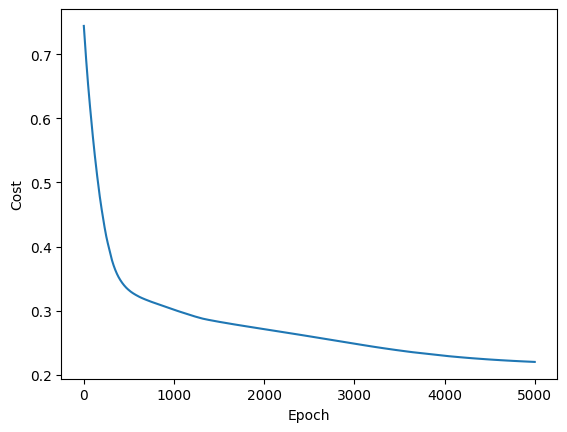

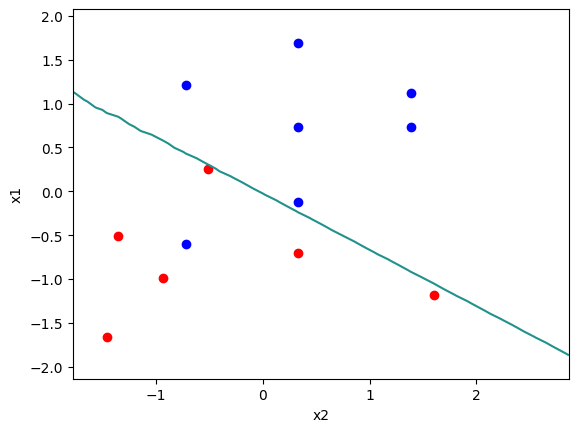

In [22]:
# Visualize Costs over Epochs
plt.plot(hist.history['loss'])
plt.ylabel("Cost")
plt.xlabel("Epoch")
plt.show()

# plot a surface based on the returned function parameters

# reshape result to have the same organization as result of meshgrid
ys = np.reshape(predictions,(mesh_rows,mesh_cols))
x1s = np.reshape(X_test[:,0],(mesh_rows,mesh_cols))
x2s = np.reshape(X_test[:,1],(mesh_rows,mesh_cols))

for l in range(len(Y)):
    if Y[l] == 0:
        plt.plot(X[l,0],X[l,1],'o',c='r')
    elif Y[l] == 1:
        plt.plot(X[l,0],X[l,1],'o',c='b')
    else: print(Y[l])

plt.contour(x1s, x2s, ys, 1)
plt.ylabel("x1")
plt.xlabel("x2")
plt.show()

Note that we will often end up with slightly different variations of our decision boundary. You can run the code above multiple times to see the variations that are possible. Here for example is one decision boundary learned with RELU based hidden layers and the CELF:

<!-- relu_overfitting.png -->
<img width="300" src="https://drive.google.com/uc?id=1G9ECLo8dZDFzeCSMhbUUO16rXE6xYxPM"/>

While here is an example of a decision boundary that a network with only 2 logistic hidden layers each of 8 neurons was able to learn.

<!-- nn_overlearning.png -->
<img width="300" src="https://drive.google.com/uc?id=1e00ArtGLwk4O5UcBgnvZEBvxd4Dysj3O"/>


<!-- nn_overlearning2.png -->
<img width="300" src="https://drive.google.com/uc?id=1OuY9nGU3N60y5k-Vqeh8C2URFt097F_4"/>

Each of these decision boundaries are quite amazing, and demonstrate that the networks can come up with some pretty unique ways to fit the data.

On the other hand these examples clearly show that the networks can overfit the data. Another way to examine this potential for overfitting is to examine performance changes as a trained network is applied to new testing data. In an overfit network the performance of the network on training data will be very high, but performance will drop off considerably when applied to new test data (we will illustrate this particular problem with a text classification example later in this session). We want to minimize this performance dropoff while ensuring the best possible outcome for our training.

Fortunately we can again add regularization to provide introduces a dampening effect on the model parameters - which in our case here are the network's weights.

Working with the case of the Mean Square Error loss function the total non-regularized cost for n training examples is given by:

\begin{equation*}
   C = \frac{1}{2} \sum_{i} (y_{i} - a_{i})^{2}
\end{equation*}

where i is an index over our training examples.

We can add an L2 regression term to our error function to penalize high values for weights in our network as follows:

\begin{equation*}
   C = \frac{1}{2} \sum_{i} (y_{i} - a_{i})^{2} + \frac{\lambda}{2} \sum_{k} \theta_{k}^{2}
\end{equation*}

In backpropogation we calculate and iteratively apply $\frac{\partial E}{\partial \theta_{i}}$. Given our regularized cost function above our equation for  $\frac{\partial E}{\partial \theta_{i}}$ becomes:

\begin{equation}
\frac{\partial E}{\partial \theta_{i}} = \sum_{i} (y_{i} - a_{i}) + \lambda \sum_{k} \theta_{k}^{2}
\end{equation}

We introduce standard L2 regression (Ridge) by forcing non-bias weights to include a regularization term to act against the Delta adjustment.

TensorFlow will do this job of Regularization for us pretty easily. We can activate L2 regularization by introducing an extra penalty into our loss function definition that is calculated for us by TensorFlow for each of our weight sets.

64/64 [==============================] - 0s 2ms/step


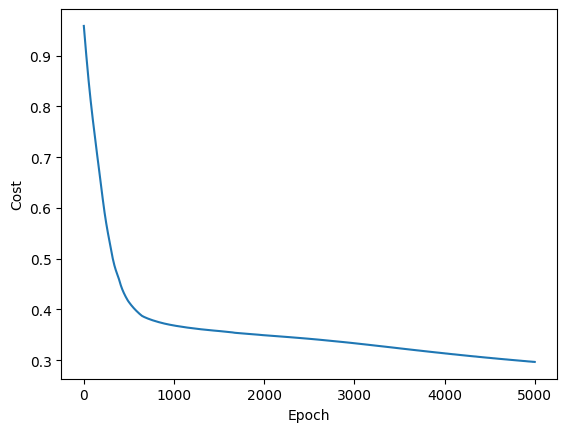

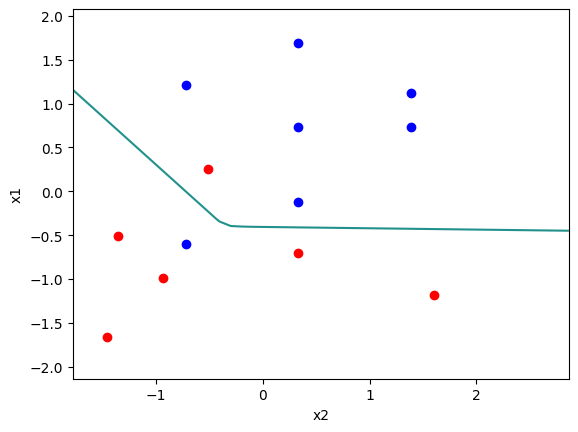

In [23]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(n_hidden_1,
                        input_shape=(n_input,),
                        activation=tf.nn.relu,
                        kernel_regularizer=tf.keras.regularizers.l2(0.05)),
  tf.keras.layers.Dense(n_classes, activation=tf.nn.sigmoid)
])

model.compile(optimizer="adam",
                  loss='binary_crossentropy',
                   metrics=['accuracy'])

hist = model.fit(X, Y, epochs=training_epochs,verbose=0)
predictions = model.predict(X_test)

# Visualize Costs over Epochs
plt.plot(hist.history['loss'])
plt.ylabel("Cost")
plt.xlabel("Epoch")
plt.show()

# plot a surface based on the returned function parameters

# reshape result to have the same organization as result of meshgrid
ys = np.reshape(predictions,(mesh_rows,mesh_cols))
x1s = np.reshape(X_test[:,0],(mesh_rows,mesh_cols))
x2s = np.reshape(X_test[:,1],(mesh_rows,mesh_cols))

for l in range(len(Y)):
    if Y[l] == 0:
        plt.plot(X[l,0],X[l,1],'o',c='r')
    elif Y[l] == 1:
        plt.plot(X[l,0],X[l,1],'o',c='b')
    else: print(Y[l])

plt.contour(x1s, x2s, ys, 1)
plt.ylabel("x1")
plt.xlabel("x2")
plt.show()

In the example above TensorFlow does the hard work of calculating the L2 error for our weights so long as we clearly identify the weights we are interested in. The effect was that in the same number of training iterations we did not get down into the same overfitting territory as we did without the regularisation. While this is a toy example, the basic principle holds to much more complex cases -- namely that it is good to not let our weights get out of control.

Note that in the example above we only added regularisation to the hidden layer. Try adding them to the second layer and see what happens.

## Early Stopping
A second important method to prevent overfitting of our models is to make use of Early Stopping techniques. Early stopping techniques can be applied to all Machine Learning methods and rely on the correct use of training and validation data.

In short Early Stopping simply states that we should stop training when the error on our validation data is minimized. This is best explained with the figure below.

<!-- early_stopping.png -->
<img width="300" src="https://drive.google.com/uc?id=1OidpqmwCH9JPaX35jCaCPSno9VYF0G0l"/>


As indicated, Early Stopping is not a Neural Network specific technique but is rather a standard mechanism in Machine Learning. The assumption is that the distribution of our Validation Data and Test Data are similar and thus by stopping at the minimum error for Validation data we are minimizing the error on our test or real world data. In practice the distributions of Validation and Test data do vary unless we have access to very large Validation data sets or our domain is simplistic. Nevertheless Early Stopping with the correct use of Validation and Test data should always be applied so long as enough data is available.

In practice the reduction in errors is rarely as smooth as in the illustration above. Instead our validation data set error will at times start to increase, but will then resume decreasing. Thus the key issue in Early Stopping is making the best decision possible on what the error minimum is. Options available include:

 * Stopping the first time the validation error increases - almost never a good option due to minor fluctuations in the validation error.
 * Stopping when the validation error has failed to decrease for a set number of training iterations - usually a viable approach, though defining the set number of allowed increases is
 * Regressing to the best model (measured by validation error) after completing a complete training session which ended at some point which was defined independently of validation error.

## Early Stopping Example

In the example below we will switch to using a simple text classification data set based on an IMDB review dataset. The number of examples in this dataset is very small which makes it ideal for illustration. However, note that this dataset does not include a validation dataset, so we use the test dataset in the role of a validation dataset.

In [ ]:
import tensorflow_hub as hub
import tensorflow_datasets as tfds

num_epochs = 3

# Prepare training and testing data - we have 14 classes in this dataset
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews",
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))

embedding = "https://tfhub.dev/google/universal-sentence-encoder/4"
hub_layer = hub.KerasLayer(embedding, input_shape=[],
                           dtype=tf.string, trainable=False)
hub_layer(train_examples_batch[:3])

model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

hist = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=10,
                    validation_data=validation_data.batch(512),
                    verbose=0)

# Visualize Costs over Epochs
plt.plot(hist.history['loss'],label="training loss")
plt.plot(hist.history['val_loss'],label="validation loss")
plt.ylabel("Cost")
plt.xlabel("Epoch")
plt.show()

results = model.evaluate(test_data.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteUJRQCO/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteUJRQCO/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteUJRQCO/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 256995201 (980.36 MB)
Trainable params: 197377 (771.00 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________

Note that in this case we calculated the Training and Validation lost rather than relying on the training cost alone.

We see from the graph that the error on our training data goes down continuously but on most runs of the code the error on the validation data does start to go up again. The phenomena on this data set is limited due to the small size of the data set. However it is worth noting that in many research areas even a couple of points different in error can be the difference between a successful model improvement and a failed experiment.

Keras makes it very easy for us to get the model training functionality to stop at a good point. We can define a special 'callback' function specifically to monitor for the best model according to the validation loss -- subject to some patience. We can incorporate it straightforwardly as follows:

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

hist = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=num_epochs,
                    validation_data=validation_data.batch(512),
                    verbose=0,
                    callbacks=[es])

# save the model to disk
model.save_weights('./my_cp')

# Visualize Costs over Epochs
plt.plot(hist.history['loss'],label="training loss")
plt.plot(hist.history['val_loss'],label="validation loss")
plt.ylabel("Cost")
plt.xlabel("Epoch")
plt.show()

results = model.evaluate(test_data.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))


model2 = tf.keras.Sequential()
model2.add(hub_layer)
model2.add(tf.keras.layers.Dense(256, activation='relu'))
model2.add(tf.keras.layers.Dense(256, activation='relu'))
model2.add(tf.keras.layers.Dense(1))

model2.summary()
model2.load_weights('./my_cp')
model2.compile()
results = model2.evaluate(test_data.batch(512), verbose=2)



## Dropout
The final method we will consider for the prevention of overfitting in this session in Dropout. Dropout is a Neural Network based approach to minimizing overfitting.

Dropout helps to prevent complex co-adaptations between neurons in the same layer. This is achieved by forcing the development of independent neurons wherever possible. The idea is that individual neurons that can make important decisions are promoted whereas neurons that are only useful when combined with neurons in the same layer are made less likely.

Dropout is implemented in a very simple way. We turn off, or drop out, random selections of neurons during the training process. Thus during a phase of backpropagation a neuron may be ignored completely and will have no adjustments made to the weights connected to that neuron. During runtime no units dropout, i.e., all units in the network are put back in play.

This process is illustrated with the figure below. Note that in the figure we denote the dropped out units with an X. Also note that we delete the weight connections tor illustration purposes, but that in practice the weights aren't deleted, they are simply ignored in computation.

<!-- dropout.png -->
<img width="400" src="https://drive.google.com/uc?id=1BOgwTghctLBd0Gp9M2KS3Yqnf0y4-Sdu"/>


An important point to note is that we randomly select specific neurons in a layer to be dropped out during a complete training phase. Therefore we can think of training in these 4 phases:
 1. Select the neurons in a layer that are to be dropped out during this training epoch
 2. Forward propagate the signal through the network as if the dropped out units are not part of the network
 3. Calculate the cost and the cost derivate in the final layer
 4. Back propagate the cost derivative back through the network as if the dropped out units are not part of the network.
 5. Return to step 1

Thus, during a dropout learning cycle the neurons which have been dropped out will neither contribute to the error calculated, nor will they have any adjustments made to their incoming weights. The units which have remained will have to operate independently of the no longer present units.

To implement dropout we do not have to alter the implementation of a hidden layer. Instead we can introduce a binary mask after a hidden layer which can be used to make neurons disappear for all intents and purposes. The dropout mask will have the same shape as the hidden layer that it is masking. This approach is illustrated below.

<!-- dropout_mask.png -->
<img width="400" src="https://drive.google.com/uc?id=11lBoBXDWMQhddSSPtkYnUnR5zdN4i9MX"/>



As indicated, during the feedforward phase the activation of each neuron is multiplied by the mask value for that node. This results in a neuron either having an output of 0 or the original activation value. Thus the logit may still be calculated, but there is no activation to pass forward. Thus calculations with dropout layers are not substantially faster than is the case without dropout as many of the intermediate calculations continue to be made. During the backpropogation phase we apply the same mask to the calculation of $ \frac{\partial a}{\partial z}$ to prevent errors altering weights leading in to dropped units.

During a testing phase we must compensate for the fact that 50% of our units (when dropout = 50%) were inactive during any given point of our training. Specifically we need to adjust the logit values in the network to account for the greater amount of weights seen when no units are being dropped. We can do this straightforwardly by once again making use of our mask, but this time setting the mask value to 0.5 and applying it to the logit calculation during the feedforward phase.

Since we implement dropout with a dedicated masking layer there can be ambiguity in our terminology. When we refer to a 'dropout layer' we are almost certainly referring to a mask layer which implements dropout. However we will sometimes refer to a 'hidden layer with dropout' or similar. In this sort of case we are usually referring to the more abstract case of a hidden layer that has had dropout applied. A dropout layer was probably used to implement this, but we are not talking about that low-level specific in that case.

### Dropout with TensorFlow

Dropout can be implemented very easily in a vanilla implementation such as our homebrew neural network implementation. TensorFlow makes it even easier to providing us with an implementation of a Dropout Layer which we can simply insert following a Hidden Layer to achieve dropout. The layer is 'plumbed' in between the hidden layer and the subsequent layer in the normal way (see below)  and is initialized with a value which indicates the proportion of units in that layer which should be kept active. The dropout implementation takes care of all the hard work of (a) masking forward and then back propagation; and (b) scaling activations during testing / usage phases to make sure that the dropout has been compensated for.

In the code below we introduce a dropout layer to our text classification task. Note that for this example we use a hidden layer of 20 units and have dropout 40% of our units during training.

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5)),
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

hist = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=num_epochs,
                    validation_data=validation_data.batch(512),
                    verbose=0)

# Visualize Costs over Epochs
plt.plot(hist.history['loss'],label="training loss")
plt.plot(hist.history['val_loss'],label="validation loss")
plt.ylabel("Cost")
plt.xlabel("Epoch")
plt.show()

results = model.evaluate(test_data.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

# Suggested Assignments / Tasks

Use your own dataset of choice to investigate Dropout and Early Stopping. This dataset can be a text dataset or perhaps a vision or business data dataset.
